In [1]:
from cobra.io import read_sbml_model
from cobra import Metabolite, Reaction
import cobra
from collections.abc import Mapping
from cameo.strain_design import OptGene
from cameo import models
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo import phenotypic_phase_plane
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design import OptKnock
from cameo.strain_design.heuristic.evolutionary_based import CofactorSwapOptimization
from cameo.strain_design.heuristic.evolutionary.objective_functions import product_yield
from cameo.strain_design.heuristic.evolutionary.optimization import CofactorSwapOptimization, NADH_NADPH
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from pytest import approx
from matplotlib import pyplot as plt
import numpy as np
model = read_sbml_model('iUMN146_1321.xml')

## Metabolites, Reactions and Enzymes to be added in model
none
***

In [31]:
for metabolite in model.metabolites:
    print (f'{metabolite.name} , {metabolite.id}')

glucose_reaction= model.reactions.EX_glc__D_e
glucose_met = model.metabolites.glc__D_e
biomass = model.reactions.BIOMASS_Ec_iJO1366_core_53p95M


Phosphatidylethanolamine (dihexadec-9enoyl, n-C16:1) , pe161_c
DCTP C9H12N3O13P3 , dctp_c
Phosphatidylglycerol (dihexadecanoyl, n-C16:0) , pg160_p
GTP C10H12N5O14P3 , gtp_c
Protoheme C34H30FeN4O4 , pheme_c
L-Glutamine , gln__L_c
Nicotinamide adenine dinucleotide - reduced , nadh_c
Phosphate , pi_c
5,6,7,8-Tetrahydrofolate , thf_c
Copper , cu2_c
Putrescine , ptrc_c
L-Isoleucine , ile__L_c
Nicotinamide adenine dinucleotide phosphate , nadp_c
Biotin , btn_c
Calcium , ca2_c
L-Tryptophan , trp__L_c
5-Methyltetrahydrofolate , 5mthf_c
Glycogen C6H10O5 , glycogen_c
Sulfate , so4_c
[4Fe-4S] iron-sulfur cluster , 4fe4s_c
Thiamine diphosphate , thmpp_c
Coenzyme A , coa_c
Ubiquinol-8 , q8h2_c
L-Lysine , lys__L_c
Siroheme C42H36FeN4O16 , sheme_c
Phosphatidylethanolamine (dioctadec-11-enoyl, n-C18:1) , pe181_p
P-Cresol , 4crsol_c
Two disacharide linked murein units, tetrapeptide corsslinked tetrapeptide (A2pm->D-ala) (middle of chain) , murein4px4p_p
DATP C10H12N5O12P3 , datp_c
Ammonium , nh4_c
5'-d

In [3]:
model.metabolites.succ_e

<Metabolite succ_e at 0x26bf3678a00>

In [21]:
model.reactions.EX_glc__D_e

<Reaction EX_glc__D_e at 0x26bf3d6d400>

***
### Adding the metabolites
***

***
### Adding the reactions
***

***
### Setting the objective to Succinate production
***

In [8]:
model.objective = {model.reactions.EX_succ_e: 1}
solution = model.optimize()
print('The maximum production rate of THC using the heterologous organism is {:.2f} mmol/h*gDw'.format(solution.fluxes.EX_succ_e))



The maximum production rate of THC using the heterologous organism is 17.14 mmol/h*gDw


***
## Phenotypic phase plane analysis using cobra and cameo
***

First we use cobra's method

In [9]:
model.reactions.BIOMASS_Ec_iJO1366_core_53p95M

<Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x26bf3cafe80>

In [10]:
model.medium

{'EX_cu2_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0}

In [11]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

ppp_gluc = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.BIOMASS_Ec_iJO1366_core_53p95M)

ppp_gluc

carbon_source  flux_minimum  carbon_yield_minimum  \
0   EX_glc__D_e, EX_co2_e           0.0                   0.0   
1   EX_glc__D_e, EX_co2_e           0.0                   0.0   
2   EX_glc__D_e, EX_co2_e           0.0                   0.0   
3   EX_glc__D_e, EX_co2_e           0.0                   0.0   
4   EX_glc__D_e, EX_co2_e           0.0                   0.0   
5   EX_glc__D_e, EX_co2_e           0.0                   0.0   
6   EX_glc__D_e, EX_co2_e           0.0                   0.0   
7   EX_glc__D_e, EX_co2_e           0.0                   0.0   
8   EX_glc__D_e, EX_co2_e           0.0                   0.0   
9   EX_glc__D_e, EX_co2_e           0.0                   0.0   
10  EX_glc__D_e, EX_co2_e           0.0                   0.0   
11  EX_glc__D_e, EX_co2_e           0.0                   0.0   
12  EX_glc__D_e, EX_co2_e           0.0                   0.0   
13  EX_glc__D_e, EX_co2_e           0.0                   0.0   
14  EX_glc__D_e, EX_co2_e           0.0                   0.0   
15  EX_glc__D_e, EX_co2_e           0.0                   0.0   
16  EX_glc__D_e, EX_co2_e           0.0                   0.0   
17  EX_glc__D_e, EX_co2_e           0.0                   0.0   
18  EX_glc__D_e, EX_co2_e           0.0                   0.0   
19  EX_glc__D_e, EX_co2_e           0.0                   0.0   

    mass_yield_minimum  flux_maximum  carbon_yield_maximum  \
0                  NaN      0.982478          9.506190e+00   
1                  NaN      0.930784          9.499266e+00   
2                  NaN      0.879089          9.491539e+00   
3                  NaN      0.827394          9.482861e+00   
4                  NaN      0.775699          9.473046e+00   
5                  NaN      0.724005          9.461855e+00   
6                  NaN      0.672310          9.448975e+00   
7                  NaN      0.620615          9.433993e+00   
8                  NaN      0.568920          9.416351e+00   
9                  NaN      0.517226          9.395268e+00   
10                 NaN      0.465531          9.369631e+00   
11                 NaN      0.413836          9.337785e+00   
12                 NaN      0.362141          9.297164e+00   
13                 NaN      0.310447          9.243562e+00   
14                 NaN      0.258752          9.169570e+00   
15                 NaN      0.207057          9.060826e+00   
16                 NaN      0.155362          8.885330e+00   
17                 NaN      0.103668          8.554399e+00   
18                 NaN      0.051973          7.697405e+00   
19                 NaN      0.000000          1.579421e-13   

    mass_yield_maximum  EX_glc__D_e  
0                  NaN   -10.000000  
1                  NaN    -9.480739  
2                  NaN    -8.961478  
3                  NaN    -8.442217  
4                  NaN    -7.922956  
5                  NaN    -7.403695  
6                  NaN    -6.884434  
7                  NaN    -6.365174  
8                  NaN    -5.845913  
9                  NaN    -5.326652  
10                 NaN    -4.807391  
11                 NaN    -4.288130  
12                 NaN    -3.768869  
13                 NaN    -3.249608  
14                 NaN    -2.730347  
15                 NaN    -2.211086  
16                 NaN    -1.691825  
17                 NaN    -1.172564  
18                 NaN    -0.653303  
19                 NaN    -0.134043

In [12]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

ppp_thca = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_succ_e)

ppp_thca

carbon_source  flux_minimum  carbon_yield_minimum  \
0   EX_glc__D_e, EX_co2_e           0.0                   0.0   
1   EX_glc__D_e, EX_co2_e           0.0                   0.0   
2   EX_glc__D_e, EX_co2_e           0.0                   0.0   
3   EX_glc__D_e, EX_co2_e           0.0                   0.0   
4   EX_glc__D_e, EX_co2_e           0.0                   0.0   
5   EX_glc__D_e, EX_co2_e           0.0                   0.0   
6   EX_glc__D_e, EX_co2_e           0.0                   0.0   
7   EX_glc__D_e, EX_co2_e           0.0                   0.0   
8   EX_glc__D_e, EX_co2_e           0.0                   0.0   
9   EX_glc__D_e, EX_co2_e           0.0                   0.0   
10  EX_glc__D_e, EX_co2_e           0.0                   0.0   
11  EX_glc__D_e, EX_co2_e           0.0                   0.0   
12  EX_glc__D_e, EX_co2_e           0.0                   0.0   
13  EX_glc__D_e, EX_co2_e           0.0                   0.0   
14  EX_glc__D_e, EX_co2_e           0.0                   0.0   
15  EX_glc__D_e, EX_co2_e           0.0                   0.0   
16  EX_glc__D_e, EX_co2_e           0.0                   0.0   
17  EX_glc__D_e, EX_co2_e           0.0                   0.0   
18  EX_glc__D_e, EX_co2_e           0.0                   0.0   
19  EX_glc__D_e, EX_co2_e           0.0                   0.0   

    mass_yield_minimum  flux_maximum  carbon_yield_maximum  \
0                  0.0     17.142857          1.000000e+00   
1                  0.0     16.252696          1.000000e+00   
2                  0.0     15.362534          1.000000e+00   
3                  0.0     14.472372          1.000000e+00   
4                  0.0     13.582211          1.000000e+00   
5                  0.0     12.692049          1.000000e+00   
6                  0.0     11.801888          1.000000e+00   
7                  0.0     10.911726          1.000000e+00   
8                  0.0     10.021565          1.000000e+00   
9                  0.0      9.131403          1.000000e+00   
10                 0.0      8.241241          1.000000e+00   
11                 0.0      7.333611          1.000000e+00   
12                 0.0      6.417823          1.000000e+00   
13                 0.0      5.502036          1.000000e+00   
14                 0.0      4.586249          1.000000e+00   
15                 0.0      3.670461          1.000000e+00   
16                 0.0      2.754674          1.000000e+00   
17                 0.0      1.838886          1.000000e+00   
18                 0.0      0.920953          9.397912e-01   
19                 0.0      0.000000          3.977029e-14   

    mass_yield_maximum  EX_glc__D_e  
0         9.132660e-01   -10.000000  
1         9.132660e-01    -9.480739  
2         9.132660e-01    -8.961478  
3         9.132660e-01    -8.442217  
4         9.132660e-01    -7.922956  
5         9.132660e-01    -7.403695  
6         9.132660e-01    -6.884434  
7         9.132660e-01    -6.365174  
8         9.132660e-01    -5.845913  
9         9.132660e-01    -5.326652  
10        9.132660e-01    -4.807391  
11        9.141045e-01    -4.288130  
12        9.156336e-01    -3.768869  
13        9.176797e-01    -3.249608  
14        9.205584e-01    -2.730347  
15        9.249076e-01    -2.211086  
16        9.322404e-01    -1.691825  
17        9.472300e-01    -1.172564  
18        9.082435e-01    -0.653303  
19        3.843524e-14    -0.134043

<AxesSubplot:xlabel='EX_glc__D_e'>

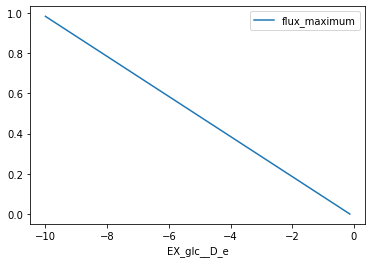

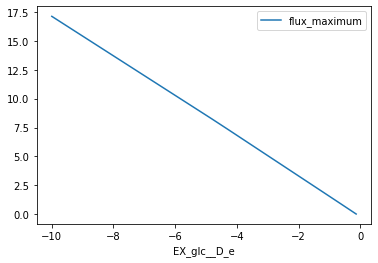

In [13]:
type(ppp_thca)
import matplotlib.pyplot as plt
ppp_gluc.plot(x="EX_glc__D_e", y="flux_maximum", kind="line")
ppp_thca.plot(x="EX_glc__D_e", y="flux_maximum", kind="line")

Finally, we can also use cameo

In [14]:
medium=model.medium
plotter = PlotlyPlotter()
growth = solution.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']
thc_production = model.optimize().objective_value
p = phenotypic_phase_plane(model, variables=['BIOMASS_Ec_iJO1366_core_53p95M'], objective='EX_succ_e')
p.plot(plotter, points=[(growth, thc_production)])

***
After computing the phenotypic phase plane we will explore the effect of different carbon sources on the theoretical maximum yield. This we will achieve by manually switching carbon sources and calculating the theoretical maximum yield.
***

***
## Medium optimization
In order to determine what effect the medium has on the maximum theoretical yield, the medium components have to be known first
***

In [15]:
model.medium

{'EX_cu2_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0}

In [16]:
model.reactions.EX_glc__D_e

<Reaction EX_glc__D_e at 0x26bf3d6d400>

In [17]:

# Find all exchange reactions
exchange_reactions = [reaction for reaction in model.reactions if "EX_" in reaction.id]
extrac_reactions= []
# Print the IDs of exchange reactions
for reaction in exchange_reactions:
    print(reaction.id, reaction.name)



EX_cpgn_e Coprogen exchange
EX_crn_e L-Carnitine exchange
EX_cpgn_un_e Coprogen unloaded (no Fe(III)) exchange
EX_colipap_e Core oligosaccharide lipid A diphosphate exchange
EX_crn__D_e D-carnitine exchange
EX_12ppd__R_e (R)-Propane-1,2-diol exchange
EX_csn_e Cytosine exchange
EX_cu_e Cu+ exchange
EX_12ppd__S_e (S)-Propane-1,2-diol exchange
EX_cu2_e Cu2+ exchange
EX_glyc_e Glycerol exchange
EX_14glucan_e 1,4-alpha-D-glucan exchange
EX_glyc__R_e (R)-Glycerate exchange
EX_cyan_e Hydrogen cyanide exchange
EX_cynt_e Cyanate exchange
EX_glyc2p_e Glycerol 2-phosphate exchange
EX_cys__D_e D-Cysteine exchange
EX_glyc3p_e Glycerol 3-phosphate exchange
EX_15dap_e 1,5-Diaminopentane exchange
EX_glyclt_e Glycolate exchange
EX_cys__L_e L-Cysteine exchange
EX_cytd_e Cytidine exchange
EX_gmp_e GMP exchange
EX_dad_2_e Deoxyadenosine exchange
EX_23camp_e 2',3'-Cyclic AMP exchange
EX_damp_e DAMP exchange
EX_dca_e Decanoate (n-C10:0) exchange
EX_dcmp_e DCMP exchange
EX_dcyt_e Deoxycytidine exchange
EX_dd

***
The theoretical maxmimum yield using this standard medium is calculated as follows:
***

In [18]:
medium = model.medium
with model:
    THCA_production = model.optimize().objective_value
    print("Max. Succinate production [mmol gDW^-1 h^-1]:", THCA_production)
    print("Theoretical max. yield [mmol-THC / mmol-glc]:", THCA_production / (-1*model.reactions.EX_glc__D_e.flux))

Max. Succinate production [mmol gDW^-1 h^-1]: 17.14285714285711
Theoretical max. yield [mmol-THC / mmol-glc]: 1.714285714285711


***
Now we will switch carbon sources and recalculate the theoretical yield
***

In [19]:
c_sources = ['EX_glc__D_e' ,'EX_succ_e', 'EX_fru_e', 'EX_fum_e', 'EX_gln__L_e' , 'EX_glu__L_e', 'EX_glyc_e', 'EX_lac__D_e', 'EX_mal__D_e', 'EX_pyr_e' ]
c_names = [ 'glucose', 'succinate' , 'fructose', 'fumarate', 'glutamine', 'glutamate', 'glycerol', 'lactate', 'malate', 'pyruvate'  ]
time= [0,1,2,3,4,5,6,7,8,9]
for t in time:
    medium = model.medium
    with model: 
            medium['EX_glc__D_e'] = 0
            medium[c_sources[t]] = 10
            model.medium = medium
            solution = model.optimize()
            thc_production = model.optimize().objective_value
            react= model.reactions.get_by_id(c_sources[t])
            print('The Succinate production using {} as a primary carbon source yields {:.2f} mmol/ gDw*h'.format(c_names[t], thc_production))
            print('yield is equal to ' + str(thc_production / (-1* react.flux)) + ' mmol / mmol {}'.format(c_names[t]) )
            model.objective = model.reactions.BIOMASS_Ec_iJO1366_core_53p95M
            solution = model.optimize()
            biomass_production = model.optimize().objective_value
            print('The biomass production using {} as a primary carbon source yields {:.2f} mmol/ gDw*h \n'.format(c_names[t], biomass_production))




The Succinate production using glucose as a primary carbon source yields 17.14 mmol/ gDw*h
yield is equal to 1.7142857142857149 mmol / mmol glucose
The biomass production using glucose as a primary carbon source yields 0.98 mmol/ gDw*h 

The Succinate production using succinate as a primary carbon source yields -0.26 mmol/ gDw*h
yield is equal to -1.0 mmol / mmol succinate
The biomass production using succinate as a primary carbon source yields 0.51 mmol/ gDw*h 

The Succinate production using fructose as a primary carbon source yields 17.14 mmol/ gDw*h
yield is equal to 1.7142857142857146 mmol / mmol fructose
The biomass production using fructose as a primary carbon source yields 0.98 mmol/ gDw*h 

The Succinate production using fumarate as a primary carbon source yields 8.52 mmol/ gDw*h
yield is equal to 0.8518367346938781 mmol / mmol fumarate
The biomass production using fumarate as a primary carbon source yields 0.45 mmol/ gDw*h 

The Succinate production using glutamine as a prima

Phenotypic phase plane (flux)

***
## OptGene
***
We will now try and find target genes to optimize the cell factory using the OptGene algorithm

In [22]:

medium=model.medium
optgene = OptGene(model)

result = optgene.run(target=model.reactions.EX_succ_e, 
                     biomass=model.reactions.BIOMASS_Ec_iJO1366_core_53p95M,
                     substrate=model.metabolites.glc__D_e,
                     max_evaluations=20000, population_size=200, max_knockouts=7,
                     plot=True, growth_coupled=False)

result

Starting optimization at Thu, 09 Nov 2023 22:52:12


c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 1), ('y', 0)



HBox()

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 2), ('y', 1)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 3), ('y', 2)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 4), ('y', 3)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 5), ('y', 4)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('x', 6), ('y', 5)

c:\Users\Lukas\anaconda3\lib\site-packages\bokeh\models\sources.py:205: BokehUserWarn

Finished after 00:31:11


***
The OptGene results show that there are no targets available to optimize THC production
***

***
## OptKnock
***
We will now use OptKnock to try and find target reactions that can be knocked out in order to increase THC yield


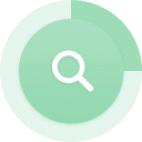

<IPython.core.display.Javascript object>

In [26]:

optknock = OptKnock(model, fraction_of_optimum=None)
result = optknock.run(max_knockouts=5, target="EX_succ_e", biomass="BIOMASS_Ec_iJO1366_core_53p95M")




In [27]:
result

HBox()

In [28]:
result.plot(plotter, 0)

Cofactor swap targets

In [33]:


model.solver = "glpk"
biomass = model.reactions.BIOMASS_Ec_iJO1366_core_53p95M
biomass.lower_bound = 0.1
demand = model.reactions.EX_succ_e
model.objective = demand

product_yield = product_yield(demand, model.reactions.EX_glc__D_e)

CofactorSwapOptimization?

swap_opt = CofactorSwapOptimization(model=model, objective_function=product_yield, plot=True, cofactor_id_swaps=(['NADP', 'NADPH'], ['NAD', 'NADH']))


result = swap_opt.run(max_size=5)

result

KeyError: 'NADP'

Init signature:
CofactorSwapOptimization(
    cofactor_id_swaps=(['nad_c', 'nadh_c'], ['nadp_c', 'nadph_c']),
    candidate_reactions=None,
    skip_reactions=None,
    *args,
    **kwargs,
)
Docstring:     
Optimize co-factor swapping

As suggested in [1]_, flux through a given reaction can sometimes be optimized by swapping complementary
co-factor. This class implements a search for reactions when swapped improve the given objective. Briefly,
the approach is to

- find reactions that have all the targeted co-factor pairs e.g. (nad_c -> nadp_c, nadh_c -> nadph_c)

- add reactions that have the co-factors swapped and then by a search algorithm switching one off in favor of the
  other

The implementation here differs from that in [1]_ in that we use a general purpose search algorithm rather than
formulating the search as a mixed integer linear programming problem.

References
----------
.. [1] King, Zachary A., and Adam M. Feist. "Optimizing Cofactor Specificity of Oxidoreductase Enzym

In [32]:
result

## Flux Scanning based on Objective  Flux

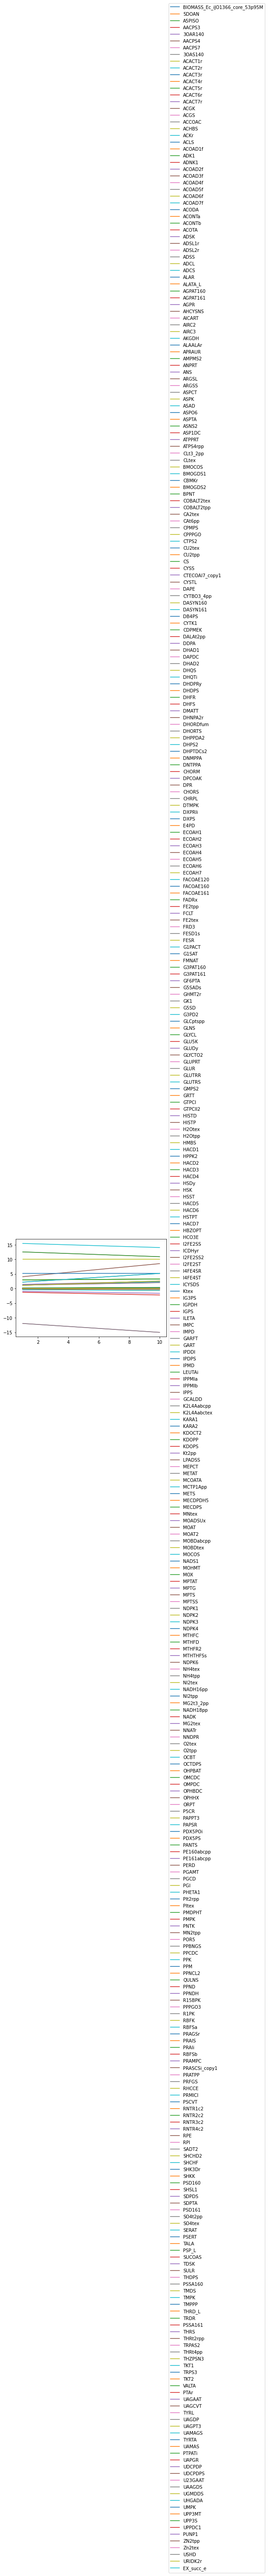

In [35]:
fseof = FSEOF(model)
result= fseof.run(target=model.reactions.EX_succ_e)
df = result.data_frame

result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [36]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 

# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

1          2          3          4          5          6   \
EX_succ_e  15.483223  15.326827  15.170430  15.014034  14.857638  14.701242   
NADH18pp   12.574410  12.392321  12.210232  12.028142  11.846053  11.663964   
FRD3       12.574410  12.392321  12.210232  12.028142  11.846053  11.663964   
PGI        10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
GLCptspp    5.202369   5.203744   5.205119   5.206494   5.207868   5.209243   

                  7          8          9          10  
EX_succ_e  14.544846  14.388449  14.232053  14.075657  
NADH18pp   11.481875  11.299786  11.117697  10.935607  
FRD3       11.481875  11.299786  11.117697  10.935607  
PGI        10.000000  10.000000  10.000000  10.000000  
GLCptspp    5.210618   5.211993   5.213368   5.214743

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

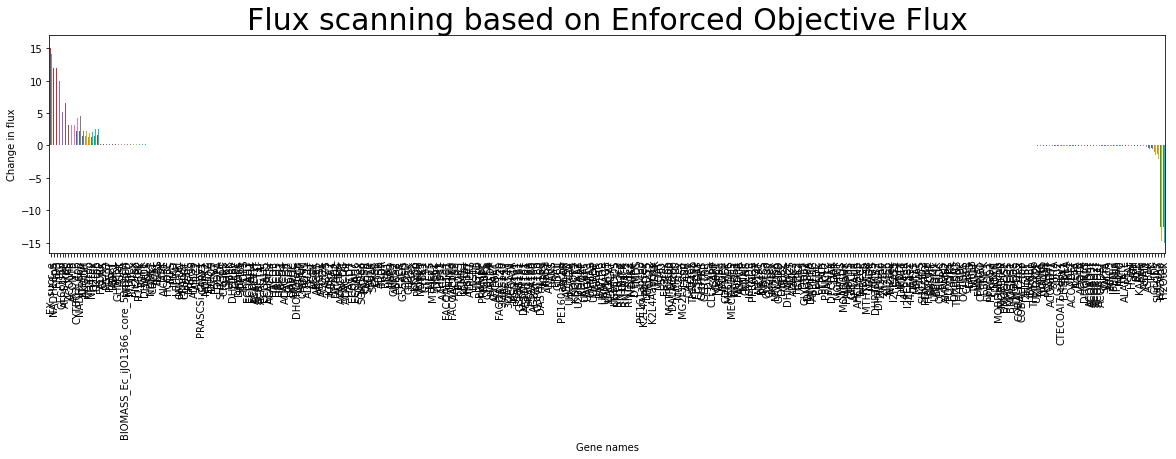

In [37]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [40]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 0.1]
target_reactions_df

1          2          3          4          5          6  \
EX_succ_e  15.483223  15.326827  15.170430  15.014034  14.857638  14.701242   
NADH18pp   12.574410  12.392321  12.210232  12.028142  11.846053  11.663964   
FRD3       12.574410  12.392321  12.210232  12.028142  11.846053  11.663964   
PGI        10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
GLCptspp    5.202369   5.203744   5.205119   5.206494   5.207868   5.209243   
...              ...        ...        ...        ...        ...        ...   
PPK        -0.378509  -0.409276  -0.440044  -0.470811  -0.501578  -0.532345   
GLUDy      -0.930834  -1.006496  -1.082159  -1.157822  -1.233484  -1.309147   
SUCOAS     -1.268648  -1.371770  -1.474892  -1.578014  -1.681136  -1.784258   
H2Otpp    -11.956951 -12.296622 -12.636293 -12.975964 -13.315635 -13.655306   
H2Otex    -11.956951 -12.296622 -12.636293 -12.975964 -13.315635 -13.655306   

                   7          8          9         10  relative_change_in_flux  
EX_succ_e  14.544846  14.388449  14.232053  14.075657                 0.900000  
NADH18pp   11.481875  11.299786  11.117697  10.935607                 0.850141  
FRD3       11.481875  11.299786  11.117697  10.935607                 0.850141  
PGI        10.000000  10.000000  10.000000  10.000000                 1.000000  
GLCptspp    5.210618   5.211993   5.213368   5.214743                 1.002373  
...              ...        ...        ...        ...                      ...  
PPK        -0.563112  -0.593879  -0.624646  -0.655413                 1.422488  
GLUDy      -1.384810  -1.460472  -1.536135  -1.611798                 1.422487  
SUCOAS     -1.887380  -1.990502  -2.093624  -2.196746                 1.422488  
H2Otpp    -13.994977 -14.334647 -14.674318 -15.013989                 1.203613  
H2Otex    -13.994977 -14.334647 -14.674318 -15.013989                 1.203613  

[380 rows x 11 columns]

In [41]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

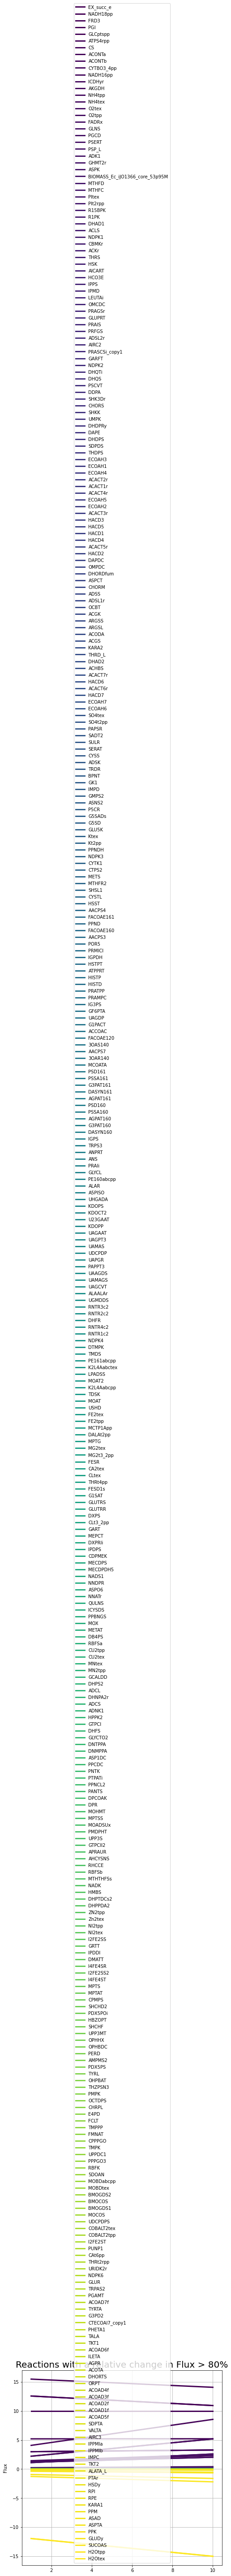

In [42]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

Dynamic flux based analysis

In [ ]:
from dfba import DfbaModel, ExchangeFlux, KineticVariable
from dfba.plot.matplotlib import *

model.objective = model.reactions.THCA_e
model.optimize();

model.solver = "glpk"
dfba_model = DfbaModel(model)


X = KineticVariable("Biomass")
Glc = KineticVariable("Glucose")
Psi = KineticVariable("Psilocybin")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Glc, Psi, Oxy])


mu = ExchangeFlux("DRAIN_Biomass")
v_G = ExchangeFlux("BOUNDARY_GLCe")
v_Psi = ExchangeFlux("psiM")
v_O = ExchangeFlux("BOUNDARY_O2e")

dfba_model.add_exchange_fluxes([mu, v_G, v_Psi, v_O])


dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X)
dfba_model.add_rhs_expression("Psilocybin", v_Psi * 284.25/1000.0 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant

dfba_model.add_exchange_flux_lb("BOUNDARY_GLCe", 2.5 * (Glc / (0.0027 + Glc)), Glc)
dfba_model.add_exchange_flux_lb("BOUNDARY_O2e", 15.0 * (Oxy / (0.024 + Oxy)), Oxy)
dfba_model.add_exchange_flux_lb("psiM", 0.7 * (Psi / (0.3 + Psi)), Psi)       #Guesstimates based on trp


with model:
    dfba_model.add_initial_conditions({"Biomass": 1, "Glucose": 20.0, "Psilocybin": 0.0, "Oxygen": 39})
    concentrations, trajectories = dfba_model.simulate(0.0, 1000.0, 0.1, ["BOUNDARY_GLCe", "psiM"])


plot_concentrations(concentrations)

plot_trajectories(trajectories)





ModuleNotFoundError: No module named 'dfba'

In [ ]:
from cobra.manipulation.delete import find_gene_knockout_reactions


In [ ]:
cd Desktop/my_project